In [1]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2024-01-10 17:40:32--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.67.194.125, 18.67.194.17, 18.67.194.183, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.67.194.125|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: 'SRR835775_1.first1000.fastq'

SRR835775_1.first10 100%[===================>] 219.52K  --.-KB/s    in 0.03s   

2024-01-10 17:40:33 (6.79 MB/s) - 'SRR835775_1.first1000.fastq' saved [224786/224786]



In [2]:
# Sequencing reads in FASTQ format
'''
NAME 
SEQUENCE
EMPTY LINE
BASE QUALITY

the characters in base quality match up with that in the sequence line
each base quality is an ascii encoding of Q = 10log10P
when Q is higher, we are more confident that the base is correct 



'''

'\nNAME \nSEQUENCE\nEMPTY LINE\nBASE QUALITY\n\nthe characters in base quality match up with that in the sequence line\neach base quality is an ascii encoding of Q = 10log10P\nwhen Q is higher, we are more confident that the base is correct \n\n\n\n'

In [3]:
def readfastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # name line should be skipped
            seq = fh.readline().rstrip() # store sequence 
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line 
            if len(seq) == 0:
                break
            sequences.append(seq) # make a list of sequences
            qualities.append(qual) #quality string associated with each sequence 
    return sequences, qualities
seqs, quals = readfastq('SRR835775_1.first1000.fastq')
print(seqs)
print(quals)

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCTACCCCTAACCCCCAACCCTCACACCAACCCTAACCCTACCCCCAACCCCAC', 'TAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGCTGGGTTAGGGGTAGGGTTAGGGTTAGGGTTAGGGGTAGGAGTTCGGGAGAGCACACG', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAACCCCAACCCCAACCCCAACCCTAACCCTAAACCCAAACCTAAA', 'AGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTGGGGTTAGGGTTGG', 'TAGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTT

In [4]:
def phred33ToQ(qual):
    return ord(qual) - 33 # ord is function that gives its ascii encoding 

In [6]:
def createHist(qualities):
    # Create a histogram of quality scores
    hist = [0]*50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


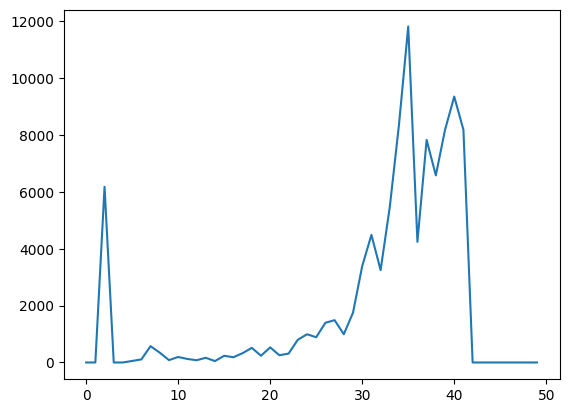

In [7]:
%pip install matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming 'h' is a list or array that you want to plot
plt.plot(range(len(h)), h)
plt.savefig('plot.png')

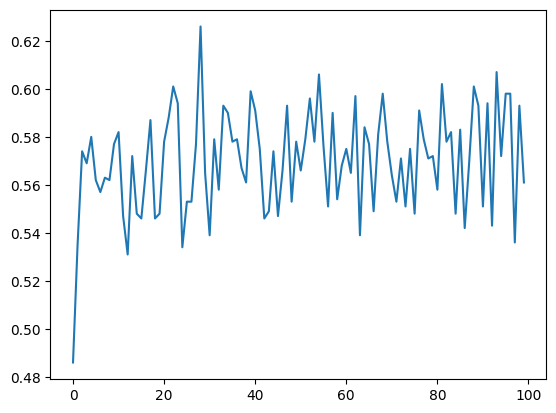

In [8]:
def findGCByPos(reads):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * 100
    totals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc

gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

In [9]:
import collections
count = collections.Counter()
for sequences in seqs:
    count.update(sequences)
print (count)

#N denotes that the base caller has no confidence to report a base 

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})
